In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import matplotlib as mpl

- given 2 points, plot a line between them: $plot\_from\_point(P0, P1,ub,lb, use\_inbuilt = False)$
- find intersection pt of 2 lines: $intersect(L1, L2, verbose = True)$
- plot a single line using ax + by = c: $plot\_lines(a,b,c,x)$
- plot multiple lines of the form a1x + b1y = c1: $plot\_(lines,ub=-5,lb=5)$
- visualise feasible region given set of inequalities: $plot\_colour(lines,signs,ub=-5,lb=5)$
- 3D visualisation example

In [3]:
def plot_from_point(P0, P1,ub,lb, use_inbuilt = False):
    x = np.array(range(ub,lb))
    fig, ax = plt.subplots(figsize=(8,6))
    plt.axis([ub, lb, ub, lb])
    x1, y1 = P0
    x2, y2 = P1
    

    num = y2 - y1
    den = x2 - x1
    if num == 0:
        y = y1


    elif den == 0:
        x = x1

    else:
        slope = num/den
        y = slope * (x - x1) + y1
    
    if not use_inbuilt:
        ax.plot(x,y)
    else:
        ax.plot([x1,x2], [y1,y2])
    
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid(linestyle='-')
    
    print('slope: ',slope)
    x2 = 1
    x1 = -slope
    c = -slope*x1+y1
    print(f'eqn: {x1}*x1 + {x2}*x2 = {c}')


slope:  0.5
eqn: -0.5*x1 + 1*x2 = 2.25


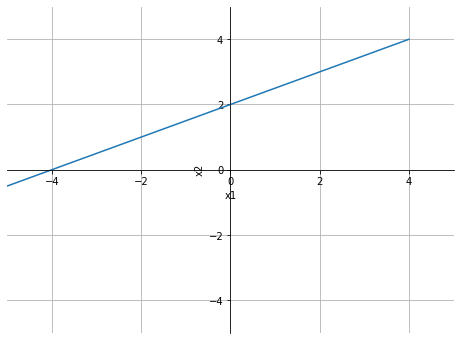

In [4]:
plot_from_point((0,2),(4,4),-5,5)

slope:  1.0
eqn: -1.0*x1 + 1*x2 = 2.0


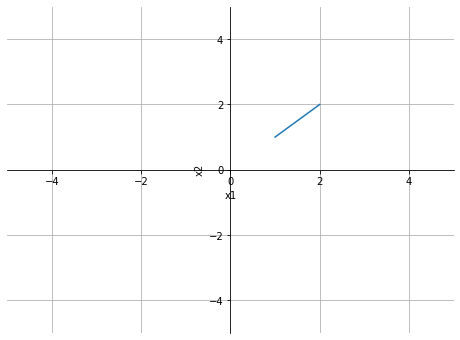

In [5]:
plot_from_point((1,1),(2,2),-5,5, use_inbuilt=True)

In [29]:
def intersect(L1, L2, verbose = True): # L1 coefficients of ax + by = c as a tuple (a,b,c)
    flag = [False]*2
    A1,B1,C1 = L1 #A1x + B1y = C1, A2x + B2y = C2
    A2,B2,C2 = L2
    
    if verbose:
        print('line 1: %f x + %f y = %f'%(A1,B1,C1))
        print('line 2: %f x + %f y = %f'%(A2,B2,C2))
    
    
    det = A1*B2 - A2*B1
    if det==0: #parallel lines, no intersection point
        return -1,-1,-1
    else:
        x = (B2*C1 - B1*C2)/det + 0 # to make -0 -> +0
        if not x.is_integer():
            x1 = format(x, '.2f') #limit decimal to 2 places
            flag[0] = True
        y = (A1*C2 - A2*C1)/det + 0 
        if not y.is_integer():
            y1 = format(y, '.2f')
            flag[1] = True
        if all(f == False for f in flag):
            # all whole
            coord = '('+ str(x) +' ,'+ str(y)+')'
        elif flag[0] and not flag[1]:
            coord = '('+ str(x1) +' ,'+ str(y)+')'
        elif not flag[0] and flag[1]:
            coord = '('+ str(x) +' ,'+ str(y1) +')'
        else:
            coord = '('+ str(x1) +' ,'+ str(y1) +')'
        
        text = coord # The text of the annotation. s is a deprecated synonym for this parameter.
        xy = (x,y) # The point (x,y) to annotate.
        xytext = (x+0.2,y+0.2) #The position (x,y) to place the text at.
        print('text: {}'.format(text))
        return text, xy, xytext

In [7]:
def plot_lines(a,b,c,x):
    #x is a numpy array
    #ax + by = c
    if b == 0:
        y = x
    else:
        y = (c - a*x)/b
   
    if a==1 and b!=1:
        eqn = 'x1 + {b}x2 = {c}'.format(b=b,c=c)
    if a!=1 and b==1:
        eqn = '{a}x1 + x2 = {c}'.format(a=a,c=c)
    if a == 0:
        if b!=1:
            eqn = '{b}x2 = {c}'.format(b=b,c=c)
        else:
            eqn = 'x2 = {c}'.format(c=c)
    if b == 0:
        if a != 1:
            eqn = '{a}x1 = {c}'.format(a=a,c=c)
        else:
            eqn = ' x1 = {c}'.format(c=c)
    if a!=0 and a!=1 and b!=0 and b!=1:
        eqn = '{a}x1 + {b}x2 = {c}'.format(a=a,b=b,c=c)
    
    if a == 1 and b == 1:
        eqn = 'x1 + x2 = {c}'.format(c=c)
        
        
    return y,eqn

In [8]:
import itertools

In [24]:
def plot_(lines,ub=-5,lb=5):
    #lines: [(a1,b1,c1), (a2,b2,c2)...] #ax + by = c
    #ub,lb: upper bound and lower bound for x axis
    x = np.array(range(ub,lb))
    fig, ax = plt.subplots(figsize=(8,6))
    
    plt.axis([ub, lb, ub, lb])
    
    for [a,b,c] in lines:
        y, e = plot_lines(a,b,c,x) #y-line, e-equation  
               
        ax.plot(x,y,label=e)
  
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
   
    all_combinations = list(itertools.combinations(lines, 2))
    for i in all_combinations:
        a,b,c = intersect(i[0],i[1], verbose = True)
        if a != b and b != c and a != -1:
            ax.annotate(a, xy=b, xytext=c)
        
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid(linestyle='--')
    
    # Add a Legend
    plt.legend()
    plt.savefig('1.png')

text: (1.0 ,1.0)


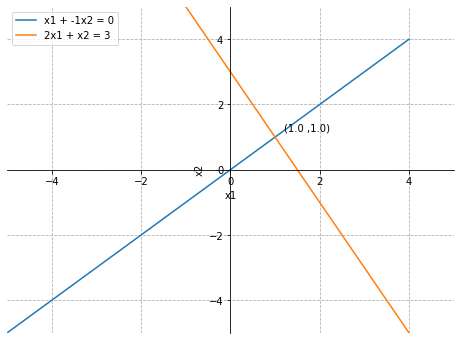

In [10]:
plot_([[ 1,-1,0],[2,1,3]])

In [11]:
from functools import reduce

In [32]:
def plot_colour(lines,signs,filename='1.png',ub=-5,lb=5):
    #lines: [(a1,b1,c1), (a2,b2,c2)...] #ax + by = c
    #ub,lb: upper bound and lower bound for x axis
    # signs : 0 => greater than ; 1 = > less than, -1 => equal to
    X = np.array(range(ub,lb))
    
    fig, ax = plt.subplots(figsize=(10,12))
    
    d = np.linspace(-2,lb,300)
    x,y = np.meshgrid(d,d)
    
    plt.axis([ub, lb, ub, lb])
 
    for [a,b,c] in lines:
        Y, e = plot_lines(a,b,c,X) #y-line, e-equation
        if b == 0:
            X_ = np.full(len(X),c)
            ax.plot(X_,Y,label=e)
  
        else:
            ax.plot(X,Y,label=e)
    
    list_ = []
    for i in range(len(signs)):
        a,b,c = lines[i]
        if signs[i] == 1: # 1 => less than
            constraint = (b*y <= -a*x + c)
            print(f'{b}*y <= {-a}*x + {c}')
        elif signs[i] == 0:
            constraint = (b*y >= -a*x + c)
            print(f'{b}*y >= {-a}*x + {c}')
        elif signs[i] == -1:
            constraint = (b*y == -a*x + c)
            print(f'{b}*y = {-a}*x + {c}')
                  
        list_.append(constraint)
   
#     res = reduce(lambda x, y: x & y, list_) 
    
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    
    lines.append([0,1,0])
    lines.append([1,0,0])
#     print(lines)
    all_combinations = list(itertools.combinations(lines, 2))
#     print(all_combinations)
    for i in all_combinations:
        text, xy , xytext = intersect(i[0],i[1], verbose = False)

        if text != xy and xy != xytext and text != -1:
            ax.annotate( xy = xy, xytext = xytext, s = text)
   
#     plt.imshow(res.astype(int), extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Purples", alpha = 0.3)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid(linestyle='dashdot')
    
    # Add a Legend
    plt.legend(loc='upper center')
    plt.savefig(filename)
    

5*y <= -4*x + 100
3*y <= -6*x + 120
0*y <= -1*x + 40
1*y <= 0*x + 30
10*y <= -4*x + 160
text: (16.67 ,6.67)
text: (40.0 ,-12.0)
text: (-12.50 ,30.0)
text: (10.0 ,12.0)
text: (25.0 ,0.0)
text: (0.0 ,20.0)
text: (40.0 ,-40.0)
text: (5.0 ,30.0)
text: (15.0 ,10.0)
text: (20.0 ,0.0)
text: (0.0 ,40.0)
text: (40.0 ,30.0)
text: (40.0 ,0.0)
text: (40.0 ,0.0)
text: (-35.0 ,30.0)
text: (0.0 ,30.0)
text: (40.0 ,0.0)
text: (0.0 ,16.0)
text: (0.0 ,0.0)


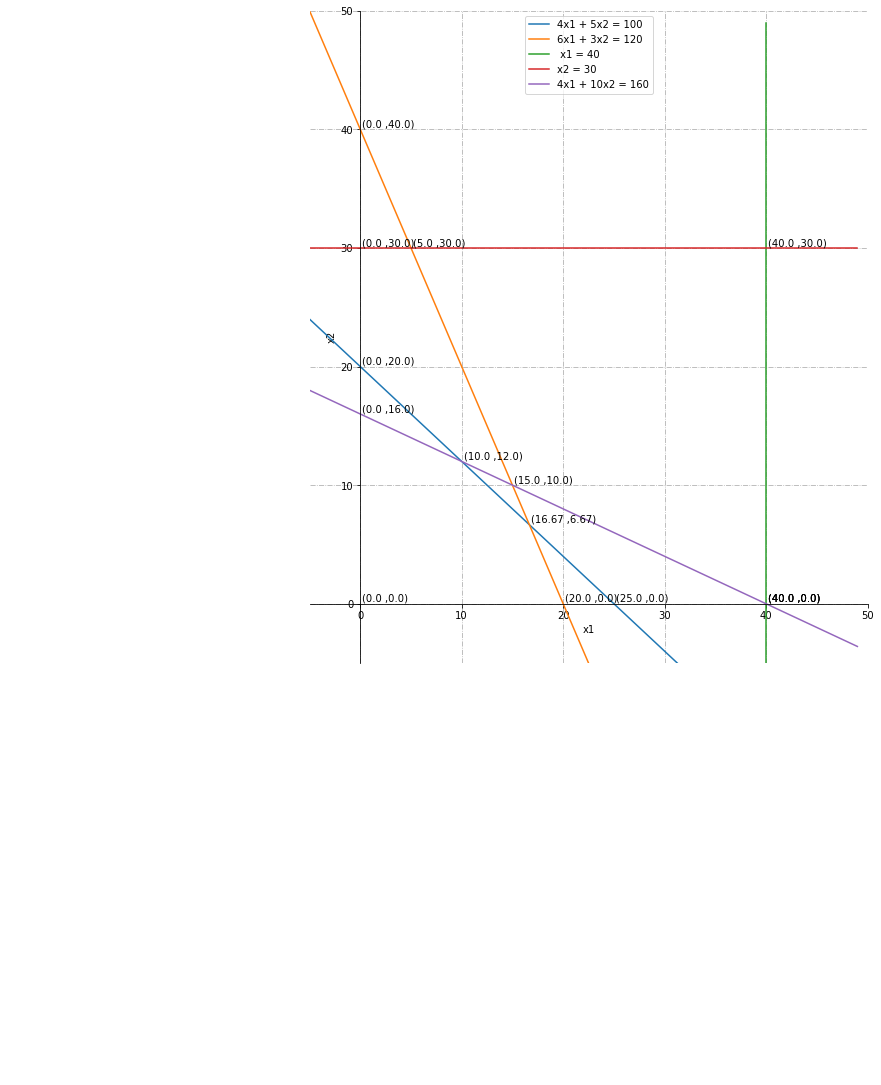

In [31]:
l1 = [4,5,100]
l2 =[6,3,120]
l3 =[1,0,40]
l4 = [0,1,30]
l5 = [4,10,160]
plot_colour([l1,l2,l3,l4,l5],[1,1,1,1,1],filename='ques1.png',lb=50,ub=-5)

0*y >= -1*x + 280
1*y >= 0*x + 700
1*y = -1*x + 1400
text: (280.0 ,700.0)
text: (280.0 ,1120.0)
text: (700.0 ,700.0)


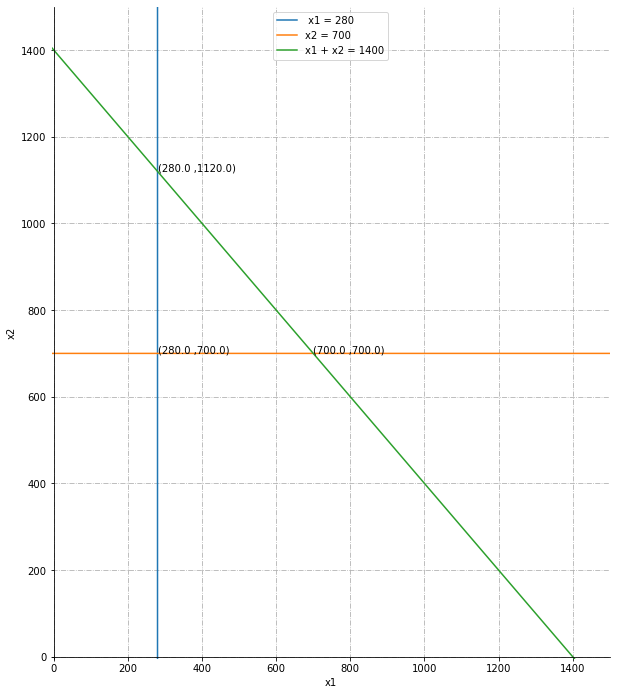

In [14]:
l3 =[1,0,280]
l4 = [0,1,700]
l5 = [1,1,1400]
plot_colour([l3,l4,l5],[0,0,-1],filename='ques2.png',lb=1500,ub=-5)

1*y >= -1*x + -1
-0.5*y <= -1*x + 2
-2*y >= -1*x + -4
1*y <= -1*x + 4
1*y <= -1*x + 8


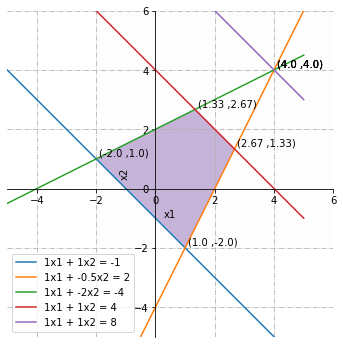

In [13]:
plot_colour([[1,1,-1],[1,-0.5,2],[1,-2,-4],[1,1,4],[1,1,8]],[0,1,0,1,1],lb=6) # 0 : greater than

<ipython-input-7-f08b9a1376a8>:5: RuntimeWarning: divide by zero encountered in true_divide
  y = (c - a*x)/b
<ipython-input-7-f08b9a1376a8>:5: RuntimeWarning: invalid value encountered in true_divide
  y = (c - a*x)/b


1*y <= -2*x + 50
2*y <= -1*x + 40
0*y >= -1*x + 0
1*y >= 0*x + 0


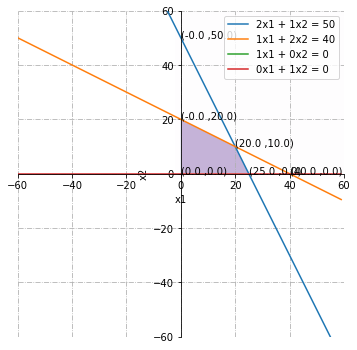

In [14]:
plot_colour([[2,1,50],[1,2,40],[1,0,0],[0,1,0]],[1,1,0,0],lb=60,ub=-60) 

<ipython-input-7-f08b9a1376a8>:5: RuntimeWarning: divide by zero encountered in true_divide
  y = (c - a*x)/b
<ipython-input-7-f08b9a1376a8>:5: RuntimeWarning: invalid value encountered in true_divide
  y = (c - a*x)/b


8*y <= -5*x + 1400
1*y <= -1*x + 250
0*y >= -1*x + 0
1*y >= 0*x + 0


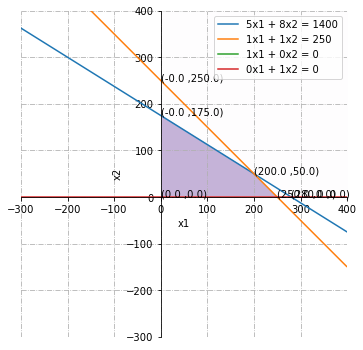

In [15]:
plot_colour([[5,8,1400],[1,1,250],[1,0,0],[0,1,0]],[1,1,0,0],lb=400,ub=-300) 

<ipython-input-7-f08b9a1376a8>:5: RuntimeWarning: divide by zero encountered in true_divide
  y = (c - a*x)/b
<ipython-input-7-f08b9a1376a8>:5: RuntimeWarning: invalid value encountered in true_divide
  y = (c - a*x)/b


1*y >= -4*x + 80
5*y >= -1*x + 115
2*y <= -3*x + 150
0*y >= -1*x + 0
1*y >= 0*x + 0


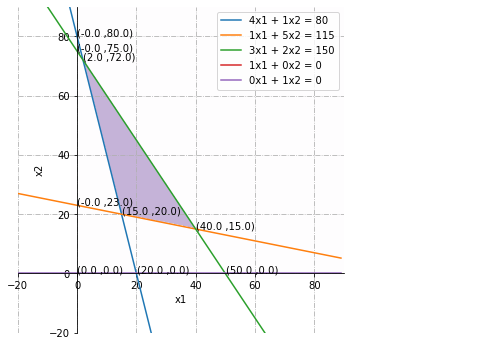

In [17]:
plot_colour([[4,1,80],[1,5,115],[3,2,150],[1,0,0],[0,1,0]],[0,0,1,0,0],lb=90,ub=-20) 

(-100.0, 100.0, -100.0, 100.0)

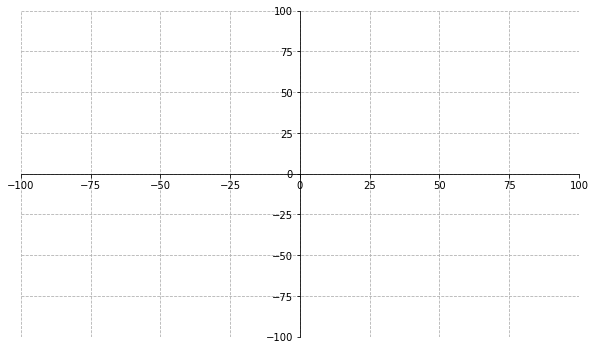

In [18]:
x = np.array(range(-100,100))

fig, ax = plt.subplots(figsize=(10,6))

ax.plot([0,0],[1,1], linewidth=2, color='red' )

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
# plt.legend()
plt.grid(linestyle='--')
plt.axis([-100, 100, -100, 100])

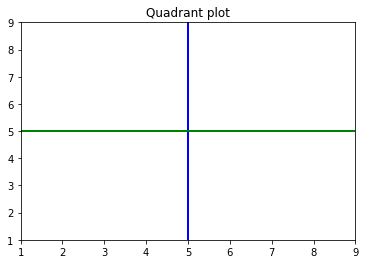

In [19]:
plt.figure()
# # Hold activation for multiple lines on same graph
# plt.hold('on')
# Set x-axis range
plt.xlim((1,9))
# Set y-axis range
plt.ylim((1,9))

plt.title('Quadrant plot')
# Draw some sub-regions in upper left quadrant
# points (5,9) and (5,1)
plt.plot([5,5],[9,1], linewidth=2, color='blue')

# points (1,5) and (9,5)
plt.plot([1,9],[5,5] ,linewidth=2, color='green')


plt.show()

## unique sol, m=n; m:eqn n:vars

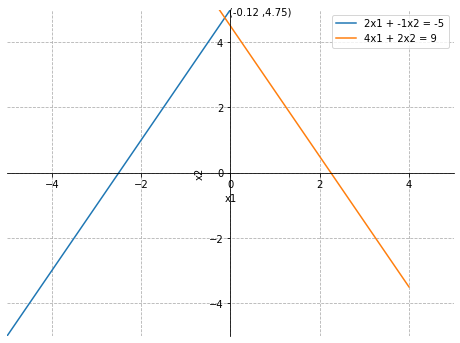

In [20]:
plot_([(2,-1,-5),(4,2,9)])

## inf sol m< n

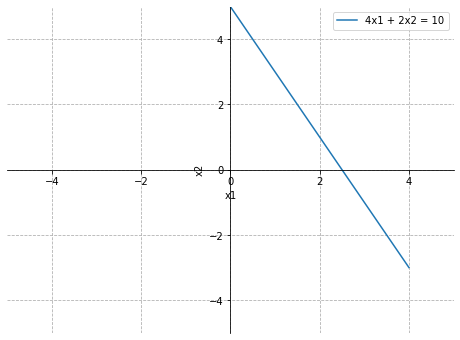

In [21]:
plot_([(4,2,10)])

## no sol m>n

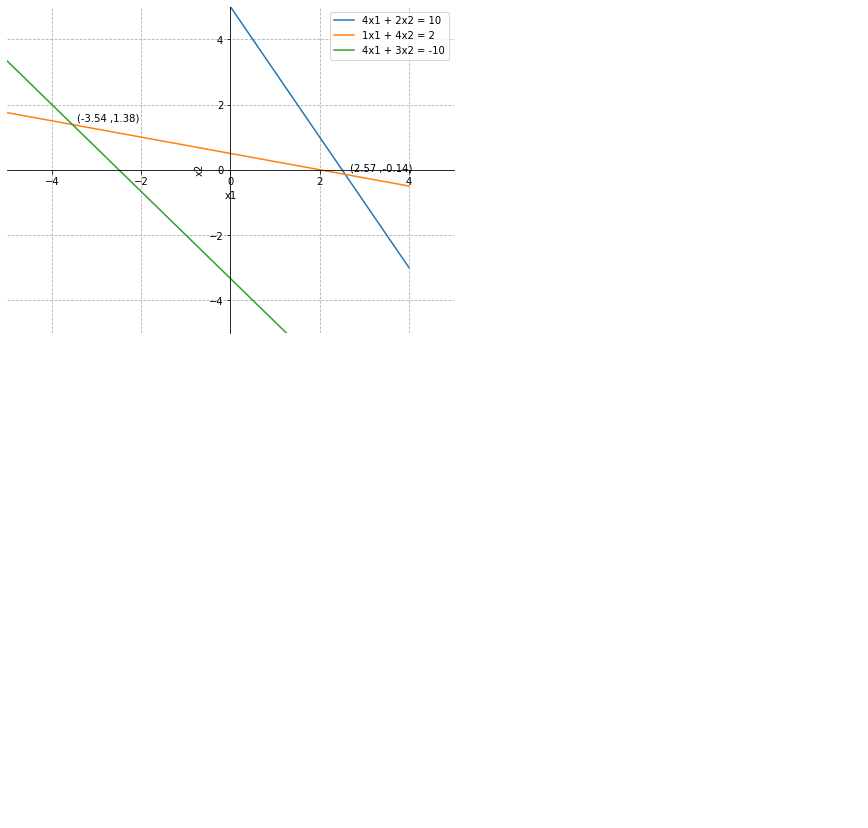

In [22]:
plot_([(4,2,10), (1,4,2), (4,3,-10)])

# 3D

In [23]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

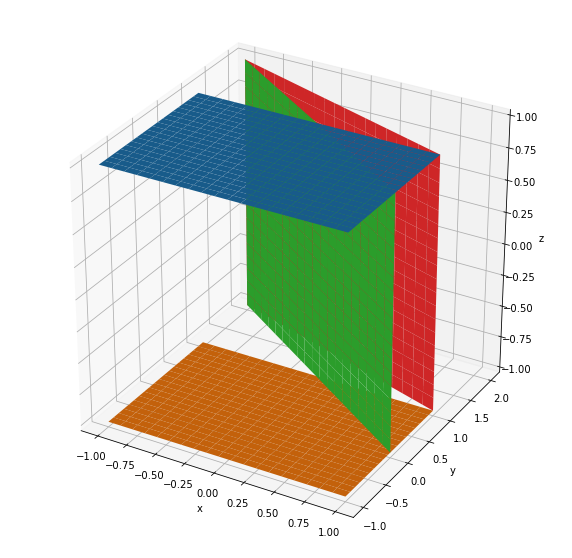

In [24]:
a,b,c,d = 0,0,1,1

x = np.linspace(-1,1,20)
y = np.linspace(-1,1,20)

X,Y = np.meshgrid(x,y)
Z = (d - a*X - b*Y) / c

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_zlabel('z')

surf = ax.plot_surface(X, Y, Z)

a,b,c,d = 0,0,1,-1
Z = (d - a*X - b*Y) / c
surf = ax.plot_surface(X, Y, Z)

x = np.linspace(-1,1,20)
z = np.linspace(-1,1,20)

X, Z = np.meshgrid(x, z)
Y = 1 - X
surf = ax.plot_surface(X, Y, Z)

Y = (3 - X)/2
surf = ax.plot_surface(X, Y, Z, label='x+2y=3')

# Y = 1-X
# surf = ax.plot_surface(X, Y, Z)
# line.set_label('Label via method')
